In [25]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

from dataset.daily_new_users import (monthly_growth,
                                     monthly_users, 
                                     add_date_column,
                                     new_users_per_day,
                                     bdays_in_period,
                                     conc_days_users,
                                     dataset_1_v1,
                                     get_firstname,
                                     get_lastname,
                                     full_name_date
                                    )


In [27]:
YEARS = [ (120, 40, 28, 24), (45, 35, 36, 23), (27, 14, 7, 3)]

In [28]:
growth_per_month = monthly_growth(YEARS)
users_per_month = monthly_users(growth_per_month)
users_per_month.head()

,Month,MonthlyGrowth,TotalUsers,NewUsers
0,month_1,0.400000,45,45
1,month_2,0.400000,63,18
2,month_3,0.400000,88,25
3,month_4,0.133333,123,35
4,month_5,0.133333,139,16


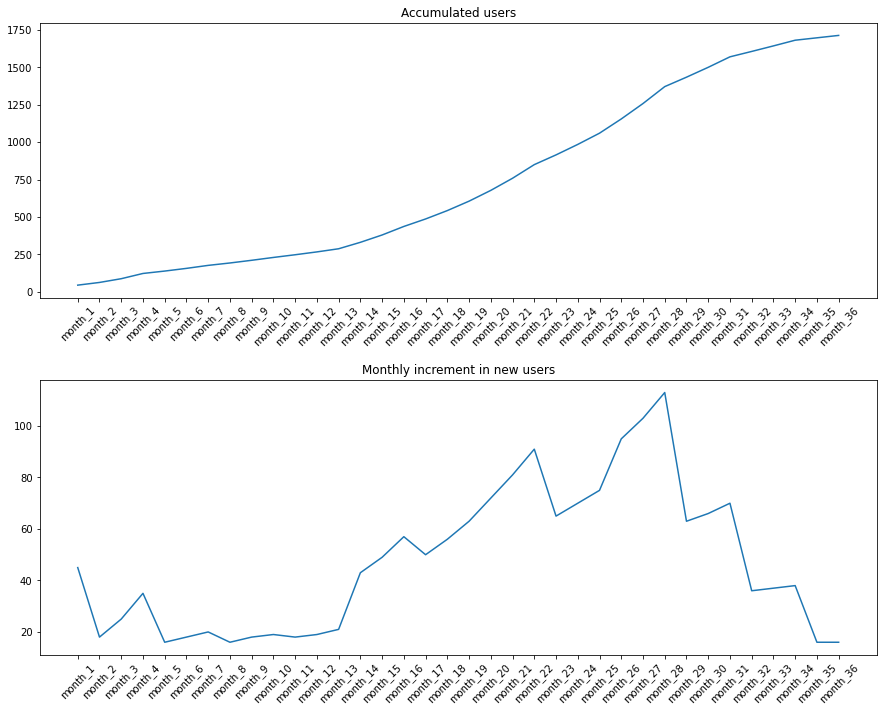

In [29]:
plt.rcParams["figure.figsize"] = (15,9)

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(users_per_month["Month"], users_per_month["TotalUsers"])
ax1.tick_params('x', labelrotation=45)
ax2.tick_params('x', labelrotation=45)
ax1.set_title("Accumulated users")
ax2.plot(users_per_month["Month"], users_per_month["NewUsers"])
ax2.set_title("Monthly increment in new users")
plt.subplots_adjust(top=1.1, 
                    hspace=0.3)
plt.show()

In [30]:
with_day = add_date_column(users_per_month)
with_day.head()

,Month,MonthlyGrowth,TotalUsers,NewUsers,Date
0,month_1,0.400000,45,45,2018-07-01
1,month_2,0.400000,63,18,2018-08-01
2,month_3,0.400000,88,25,2018-09-01
3,month_4,0.133333,123,35,2018-10-01
4,month_5,0.133333,139,16,2018-11-01


In [31]:
users_per_day = new_users_per_day(with_day)
users_per_day[:5]

[2, 3, 2, 1, 1]

In [32]:
list_of_bdays = bdays_in_period(with_day)
list_of_bdays[:5]

[Timestamp('2018-07-02 00:00:00', freq='B'),
 Timestamp('2018-07-03 00:00:00', freq='B'),
 Timestamp('2018-07-04 00:00:00', freq='B'),
 Timestamp('2018-07-05 00:00:00', freq='B'),
 Timestamp('2018-07-06 00:00:00', freq='B')]

In [33]:
users_dataset = conc_days_users(list_of_bdays, users_per_day)
users_dataset.head(10)

,Date,NewDailyUsers
0,2018-07-02,2
1,2018-07-03,3
2,2018-07-04,2
3,2018-07-05,1
4,2018-07-06,1
5,2018-07-09,1
6,2018-07-10,2
7,2018-07-11,2
8,2018-07-12,1
9,2018-07-13,2


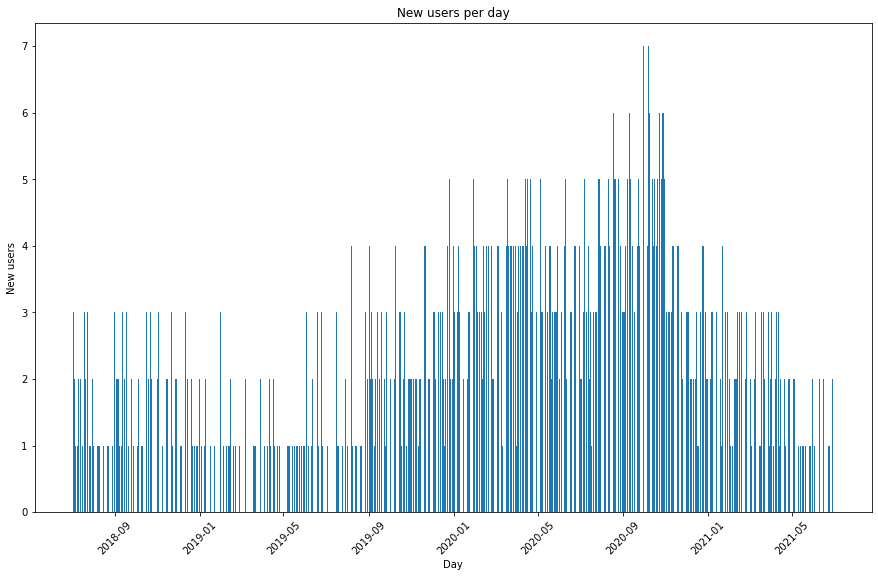

In [34]:
plt.bar(users_dataset["Date"], users_dataset["NewDailyUsers"])
plt.title('New users per day')
plt.xlabel('Day')
plt.xticks(rotation = 45)
plt.ylabel('New users')
plt.show()

In [35]:
first_dataset = dataset_1_v1(users_dataset)

In [36]:
list(first_dataset.items())[25:50]

[('user_25', '23/07/2018'),
 ('user_26', '23/07/2018'),
 ('user_27', '23/07/2018'),
 ('user_28', '24/07/2018'),
 ('user_29', '24/07/2018'),
 ('user_30', '25/07/2018'),
 ('user_31', '25/07/2018'),
 ('user_32', '26/07/2018'),
 ('user_33', '27/07/2018'),
 ('user_34', '30/07/2018'),
 ('user_35', '30/07/2018'),
 ('user_36', '31/07/2018'),
 ('user_37', '31/07/2018'),
 ('user_38', '01/08/2018'),
 ('user_39', '03/08/2018'),
 ('user_40', '06/08/2018'),
 ('user_41', '07/08/2018'),
 ('user_42', '07/08/2018'),
 ('user_43', '08/08/2018'),
 ('user_44', '09/08/2018'),
 ('user_45', '10/08/2018'),
 ('user_46', '13/08/2018'),
 ('user_47', '15/08/2018'),
 ('user_48', '16/08/2018'),
 ('user_49', '20/08/2018')]

In [37]:
first_name_dataset = get_firstname("../data/nat2020.csv", first_dataset)

In [38]:
first_name_dataset[:20]

['ARNAUD',
 'SANDRINE',
 'REYNALD',
 'LUCIE',
 'LOUISA',
 'CLÉMENT',
 'ERIC',
 'ALAN',
 'VIRGINIE',
 'SANDRINE',
 'AMÉLIE',
 'AZZIZ',
 'CHRISTOPHE',
 'AICHA',
 'JUDITH',
 'CHARLOTTE',
 'CLÉMENCE',
 'MAXIME',
 'BRUNO',
 'CÉCILE']

In [39]:
full_name = get_lastname("../data/noms2008nat_txt.txt", first_name_dataset)

In [40]:
full_name.head(20)

,FirstName,LastName
0,ARNAUD,DELAMARE
1,SANDRINE,LHERMELIN
2,REYNALD,DELAUNAY
3,LUCIE,D'ALESSIO
4,LOUISA,CAMADRO
5,CLÉMENT,FLOURY
6,ERIC,VASNIER
7,ALAN,NIVET
8,VIRGINIE,DUROUX
9,SANDRINE,HERVOUET


In [41]:
dataset_v1 = full_name_date(full_name, first_dataset)

In [42]:
dataset_v1[20:40]

,FirstName,LastName,Date
20,ELOISE,FERRERE,19/07/2018
21,THÉO,HIDOUX,19/07/2018
22,MAEL,MARIN,19/07/2018
23,NICOLAS,HAVRET,20/07/2018
24,LYDIA,ROCHETTE,20/07/2018
25,STÉPHANIE,ARRINDELL,23/07/2018
26,EMILIE,HERY,23/07/2018
27,JEROME,ARNAUD,23/07/2018
28,YAN,PERRODY,24/07/2018
29,ADRIEN,LAMOTTE,24/07/2018
